In [51]:
import pandas as pd
import streamlit as st
file_path="C:/Users/text7/Downloads/Movies/imdb_top_1000.csv"
df = pd.read_csv(file_path)
df

Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944         NaN   97 min   
999              The 39 Steps          1935         NaN   86 min   

                        Genre  IMDB_Rating  \
0                       Drama          9.3   
1                Crime, Drama          9.2   
2        Action, Crime, Drama          9.0   
3                Crime, Drama          9.0   
4                Crime, Drama          9.0   
..                        ...          ...   
995    Comedy, Drama, Romance          7.6   
996            Drama, Western          7.6   
997       Drama, Romance, War          7.6   
998                Drama, War          7.6   
999  Crime, Mystery, Thriller          7.6   

                                              Overview  Meta_score  \
0    Two imprisoned men bond over a number of years...        80.0   
1    An organized crime dynasty's aging patriarch t...       100.0   
2    When the menace known as the Joker wreaks havo...        84.0   
3    The early life and career of Vito Corleone in ...        90.0   
4    A jury holdout attempts to prevent a miscarria...        96.0   
..                                                 ...         ...   
995  A young New York socialite becomes interested ...        76.0   
996  Sprawling epic covering the life of a Texas ca...        84.0   
997  In Hawaii in 1941, a private is cruelly punish...        85.0   
998  Several survivors of a torpedoed merchant ship...        78.0   
999  A man in London tries to help a counter-espion...        93.0   

                 Director              Star1              Star2  \
0          Frank Darabont        Tim Robbins     Morgan Freeman   
1    Francis Ford Coppola      Marlon Brando          Al Pacino   
2       Christopher Nolan     Christian Bale       Heath Ledger   
3    Francis Ford Coppola          Al Pacino     Robert De Niro   
4            Sidney Lumet        Henry Fonda        Lee J. Cobb   
..                    ...                ...                ...   
995         Blake Edwards     Audrey Hepburn     George Peppard   
996        George Stevens   Elizabeth Taylor        Rock Hudson   
997        Fred Zinnemann     Burt Lancaster   Montgomery Clift   
998      Alfred Hitchcock  Tallulah Bankhead        John Hodiak   
999      Alfred Hitchcock       Robert Donat  Madeleine Carroll   

              Star3           Star4  No_of_Votes        Gross  
0        Bob Gunton  William Sadler      2343110   28,341,469  
1        James Caan    Diane Keaton      1620367  134,966,411  
2     Aaron Eckhart   Michael Caine      2303232  534,858,444  
3     Robert Duvall    Diane Keaton      1129952   57,300,000  
4     Mart

In [53]:
# Show basic info
print("Basic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [55]:
# Check for missing values
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [57]:
# Remove rows with any NaN values
df = df.dropna()

In [59]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [61]:
df = df.copy()

# --- Fix Runtime ---
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# --- Primary Genre ---
df['Primary Genre'] = df['Genre'].astype(str).str.split(',').str[0]

# --- Released Year ---
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Decade'] = (df['Released_Year'] // 10) * 10

# --- IMDb Rating Category ---
df['Rating Category'] = pd.cut(
    df['IMDB_Rating'],
    bins=[0, 6, 7.5, 8.5, 10],
    labels=['Below Avg', 'Average', 'Good', 'Excellent']
)

# --- Clean Gross ---
if df['Gross'].dtype == object:
    df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# --- Convert Votes to Millions ---
df['Votes (Million)'] = df['No_of_Votes'] / 1_000_000

# View processed columns
df[['Runtime', 'Primary Genre', 'Released_Year', 'Decade', 'Rating Category', 'Gross', 'Votes (Million)']].head()


Runtime Primary Genre  Released_Year  Decade Rating Category      Gross  \
0      142         Drama         1994.0  1990.0       Excellent   28341469   
1      175         Crime         1972.0  1970.0       Excellent  134966411   
2      152        Action         2008.0  2000.0       Excellent  534858444   
3      202         Crime         1974.0  1970.0       Excellent   57300000   
4       96         Crime         1957.0  1950.0       Excellent    4360000   

   Votes (Million)  
0         2.343110  
1         1.620367  
2         2.303232  
3         1.129952  
4         0.689845

C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


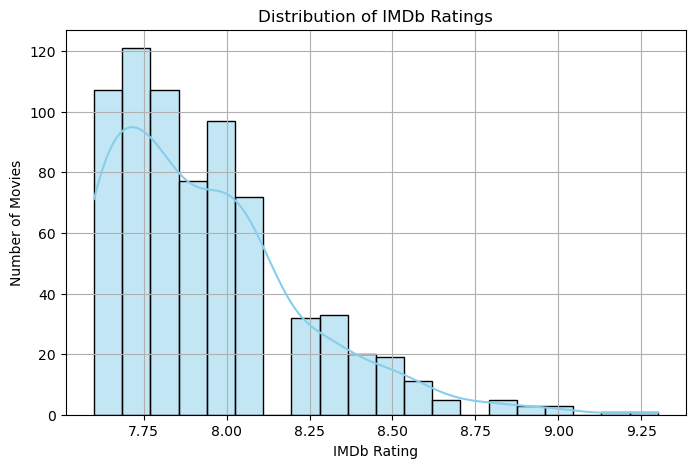

In [63]:
#IMDb Rating Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

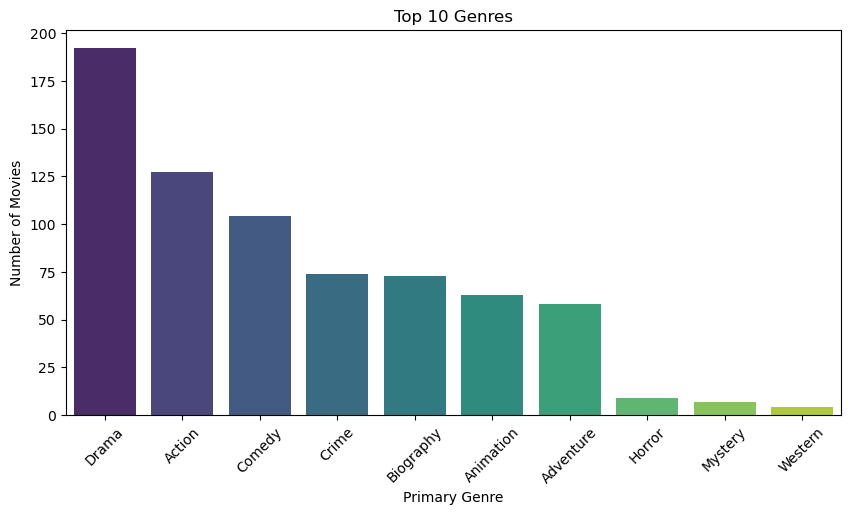

In [65]:
#Top 10 Primary Genres
plt.figure(figsize=(10,5))
top_genres = df['Primary Genre'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


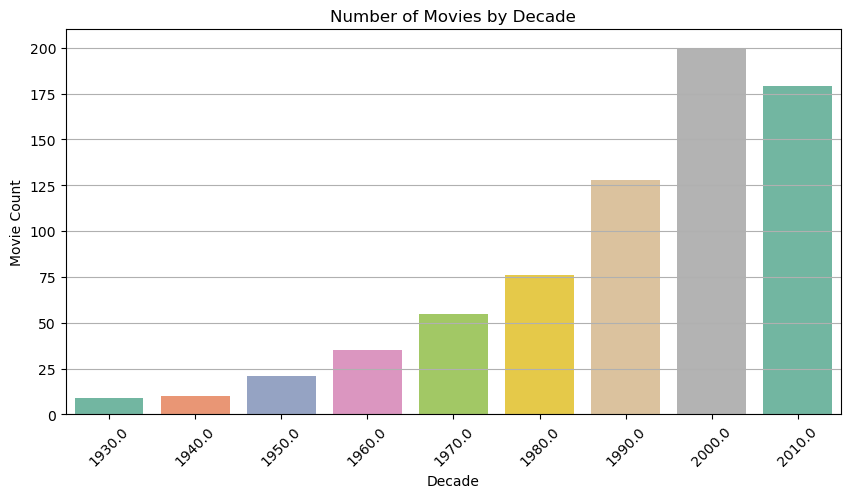

In [67]:
#Movies by Decade
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Decade', palette='Set2')
plt.title('Number of Movies by Decade')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


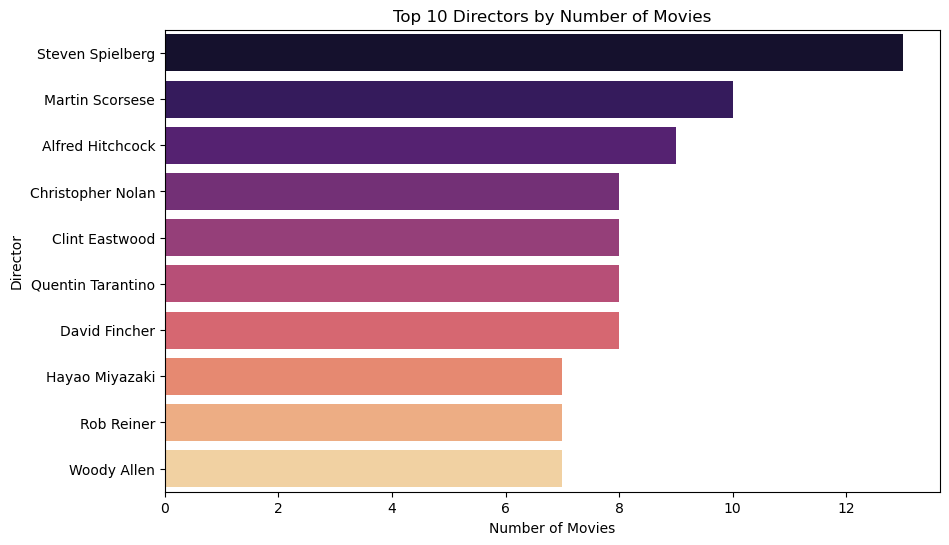

In [69]:
#4. Top 10 Directors by Number of Movies
plt.figure(figsize=(10,6))
top_directors = df['Director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values, palette='magma')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.show()

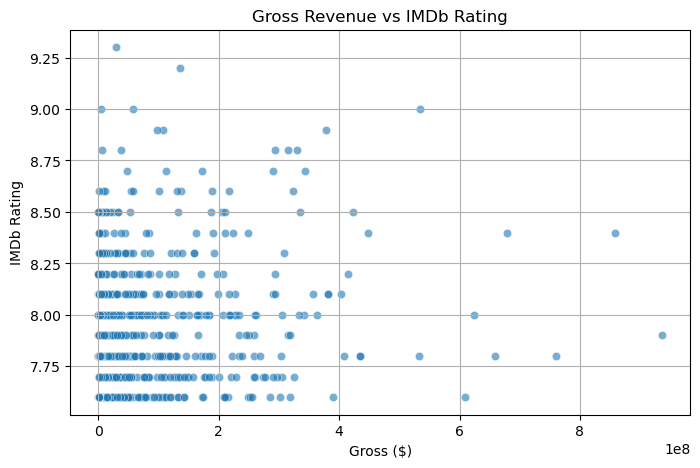

In [71]:
#5. Gross Revenue vs IMDb Rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Gross', y='IMDB_Rating', alpha=0.6)
plt.title('Gross Revenue vs IMDb Rating')
plt.xlabel('Gross ($)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()


C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


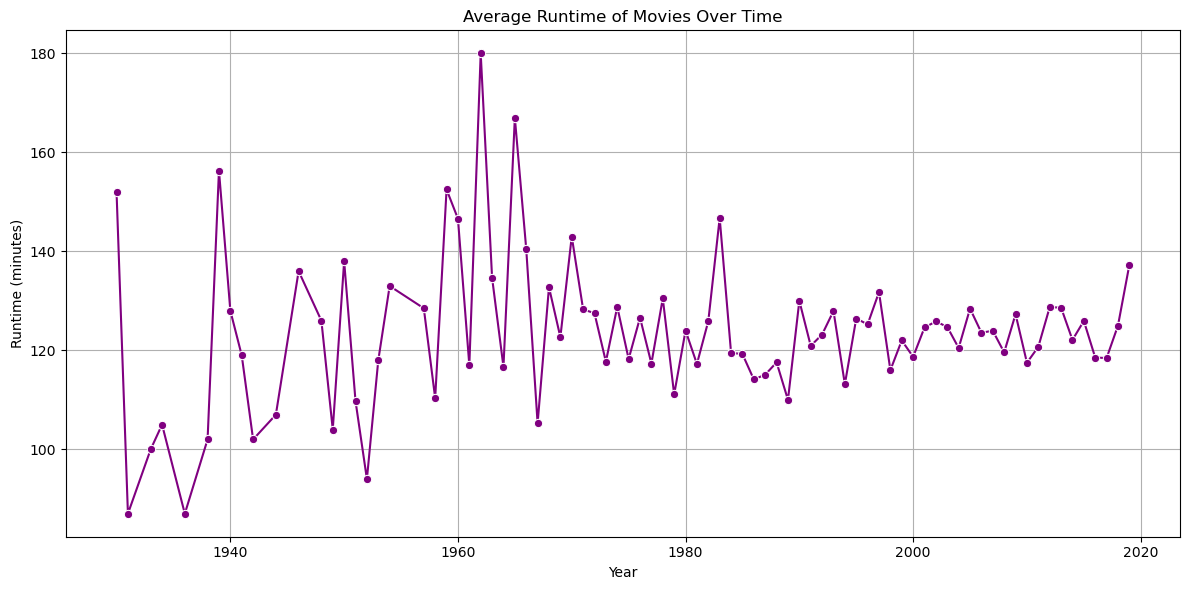

In [117]:
runtime_trend = df.groupby('Released_Year')['Runtime'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=runtime_trend, x='Released_Year', y='Runtime', color='purple', marker='o')
plt.title("Average Runtime of Movies Over Time")
plt.xlabel("Year")
plt.ylabel("Runtime (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


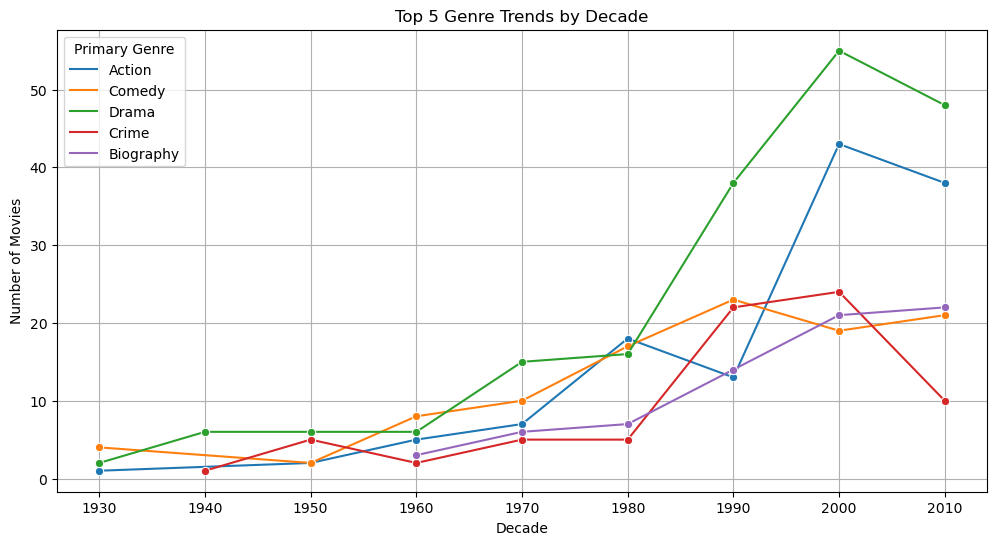

In [121]:
df['Decade'] = (df['Released_Year'] // 10) * 10
df['Primary Genre'] = df['Genre'].str.split(',').str[0]  # extract main genre

genre_trend = df.groupby(['Decade', 'Primary Genre']).size().reset_index(name='Count')
top_genres = genre_trend.groupby('Primary Genre')['Count'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trend[genre_trend['Primary Genre'].isin(top_genres)],
             x='Decade', y='Count', hue='Primary Genre', marker='o')
plt.title("Top 5 Genre Trends by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()


C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


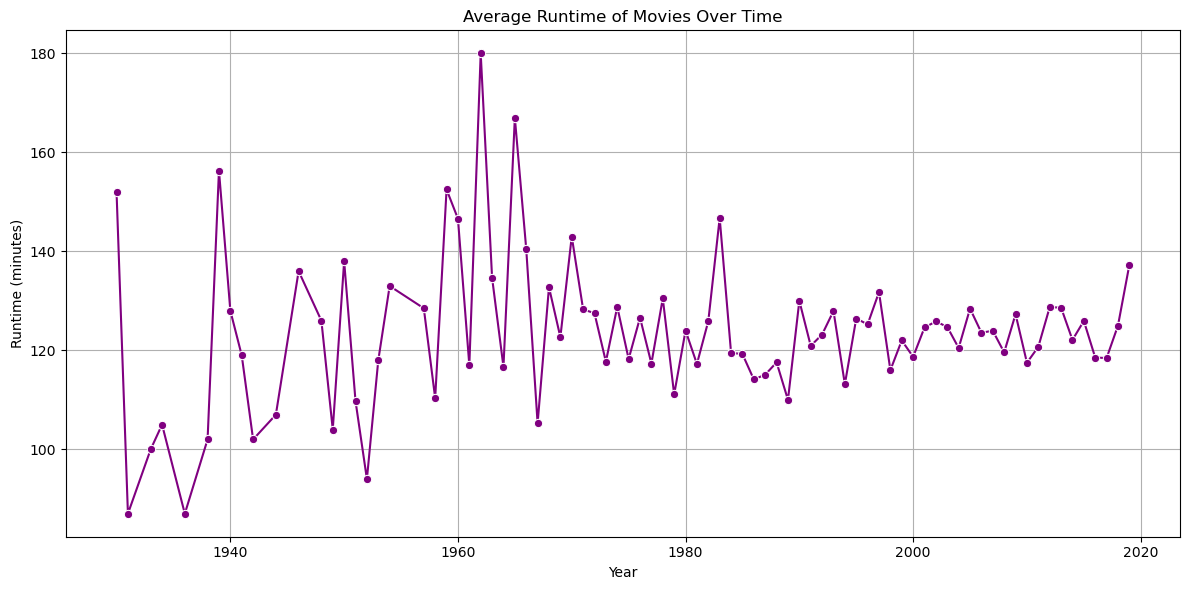

In [123]:
runtime_trend = df.groupby('Released_Year')['Runtime'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=runtime_trend, x='Released_Year', y='Runtime', color='purple', marker='o')
plt.title("Average Runtime of Movies Over Time")
plt.xlabel("Year")
plt.ylabel("Runtime (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


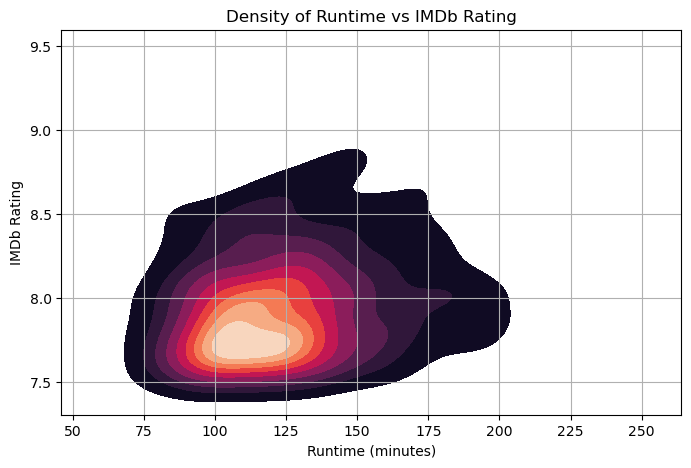

In [73]:
#6. Runtime vs IMDb Rating (Density)
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Runtime', y='IMDB_Rating', fill=True, cmap='rocket')
plt.title('Density of Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()


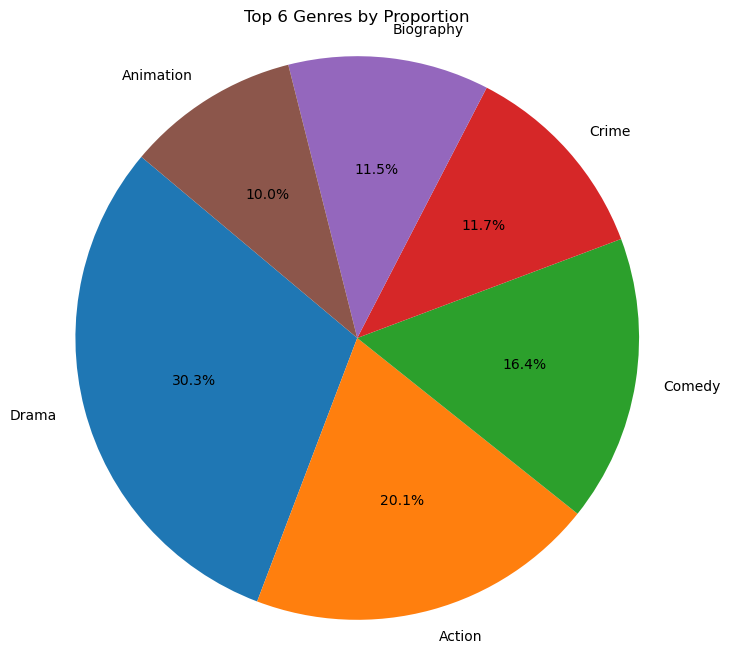

In [77]:
#Genre Distribution as Pie Chart
genre_counts = df['Primary Genre'].value_counts().head(6)
plt.figure(figsize=(8,8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 6 Genres by Proportion")
plt.axis('equal')
plt.show()


In [75]:
#Predict Movie Rating Category (Classification)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Drop NaNs and select features
df_ml = df[['Runtime', 'Votes (Million)', 'Primary Genre', 'Rating Category']].dropna()

# Encode categorical feature (genre)
le_genre = LabelEncoder()
df_ml['Genre_Code'] = le_genre.fit_transform(df_ml['Primary Genre'])

# Encode target
le_rating = LabelEncoder()
df_ml['Rating_Code'] = le_rating.fit_transform(df_ml['Rating Category'])

# Features & target
X = df_ml[['Runtime', 'Votes (Million)', 'Genre_Code']]
y = df_ml['Rating_Code']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_rating.classes_))


              precision    recall  f1-score   support

   Excellent       0.60      1.00      0.75         3
        Good       1.00      0.99      0.99       140

    accuracy                           0.99       143
   macro avg       0.80      0.99      0.87       143
weighted avg       0.99      0.99      0.99       143



In [81]:
#Predict IMDb Rating (Regression)
#Predict a movie's exact IMDb rating based on features like runtime, votes, genre, etc.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_reg = df[['Runtime', 'Votes (Million)', 'Primary Genre', 'IMDB_Rating']].dropna()

# Encode genre
df_reg['Genre_Code'] = LabelEncoder().fit_transform(df_reg['Primary Genre'])

X = df_reg[['Runtime', 'Votes (Million)', 'Genre_Code']]
y = df_reg['IMDB_Rating']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict & Evaluate
y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


MSE: 0.04479325374068674
R² score: 0.46603947340431473


C:\Users\text7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\text7\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


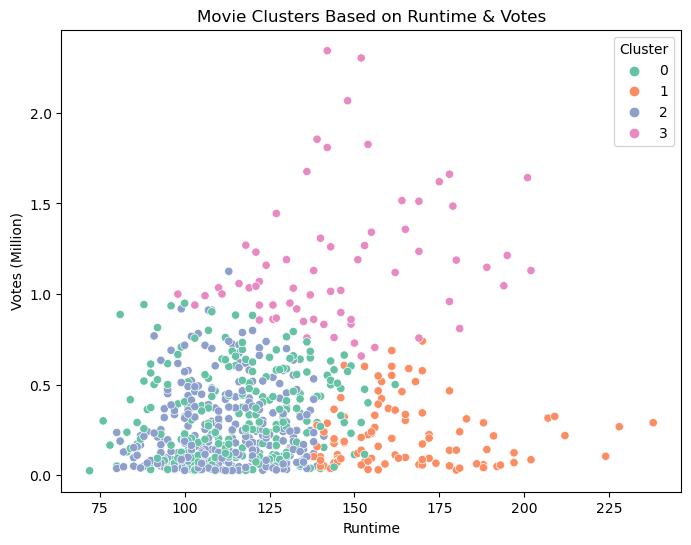

In [83]:
#Cluster Movies by Metadata (Clustering)
#Group similar movies together based on runtime, votes, and genre, without knowing labels.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_clust = df[['Runtime', 'Votes (Million)', 'Primary Genre']].dropna()

# Encode and scale
df_clust['Genre_Code'] = LabelEncoder().fit_transform(df_clust['Primary Genre'])
X = df_clust[['Runtime', 'Votes (Million)', 'Genre_Code']]
X_scaled = StandardScaler().fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_clust['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clust, x='Runtime', y='Votes (Million)', hue='Cluster', palette='Set2')
plt.title("Movie Clusters Based on Runtime & Votes")
plt.show()


In [91]:
print(df.columns)


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross',
       'Primary Genre', 'Decade', 'Rating Category', 'Votes (Million)'],
      dtype='object')


In [93]:
df['Description'] = df['Series_Title'] + " is a " + df['Genre'].astype(str) + " movie released in " + df['Released_Year'].astype(str)


In [97]:
!pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 751.6 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.4 MB/s eta 0:00:00


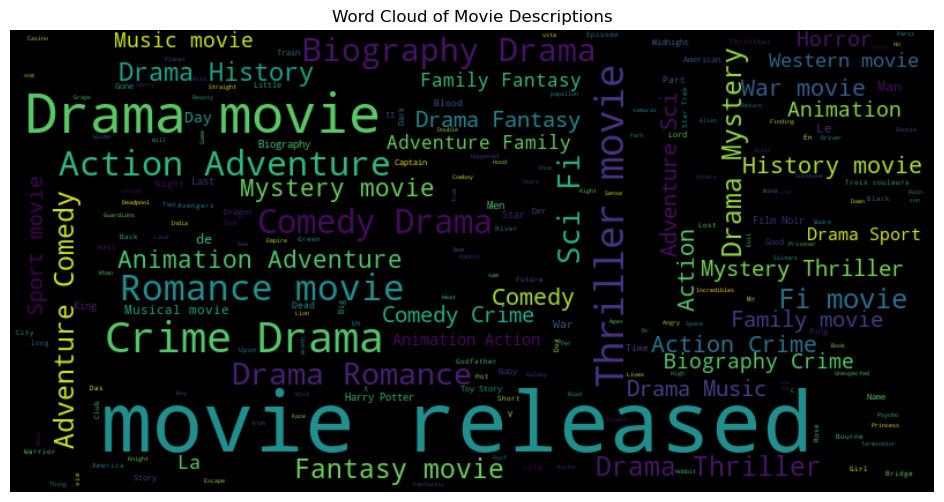

In [103]:
#Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions
text = " ".join(df['Description'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Descriptions")
plt.show()


C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


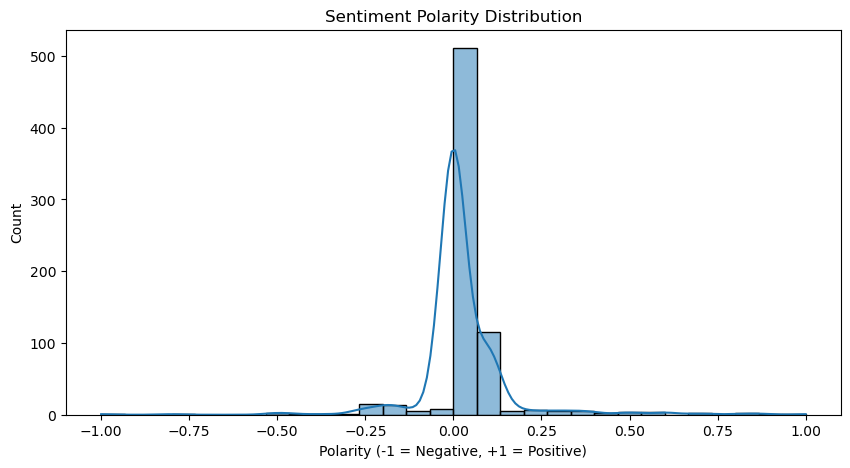

In [105]:
# Sentiment Analysis using TextBlob
from textblob import TextBlob

# Compute sentiment polarity
df['Sentiment'] = df['Description'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment
plt.figure(figsize=(10, 5))
sns.histplot(df['Sentiment'], kde=True, bins=30)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity (-1 = Negative, +1 = Positive)")
plt.show()


In [107]:
#Topic Modeling using LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocessing
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=10)
X = vectorizer.fit_transform(df['Description'].dropna())

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Show top words per topic
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{idx+1}:")
    print(", ".join([terms[i] for i in topic.argsort()[-10:]]))



Topic #1:
action, 1995, 2008, 2012, 2013, drama, animation, adventure, family, fantasy

Topic #2:
2005, sci, fi, 2006, 2001, action, 2014, thriller, mystery, drama

Topic #3:
2015, 2007, action, comedy, music, thriller, history, biography, crime, drama

Topic #4:
2011, 2019, 1998, sport, western, 1993, war, comedy, romance, drama

Topic #5:
1994, 2003, 2017, 2016, animation, fi, sci, comedy, action, adventure


In [113]:
#RECOMMENDER SYSTEM 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# STEP 1: Create a combined feature column
df['Combined_Features'] = df['Genre'].astype(str) + " " + df['Director'].astype(str) + " " + df['Description'].astype(str)

# STEP 2: Convert text to TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Combined_Features'])

# STEP 3: Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# STEP 4: Function to get recommendations
def recommend_movies(title, df=df, cosine_sim=cosine_sim):
    # Reset index to ensure access by row number
    df = df.reset_index(drop=True)
    
    # Get index of the movie title
    idx = df[df['Series_Title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        print("❌ Movie not found.")
        return
    idx = idx[0]
    
    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 excluding itself

    # Return recommended titles
    movie_indices = [i[0] for i in sim_scores]
    return df['Series_Title'].iloc[movie_indices]
# === Example ===
recommendations = recommend_movies("shrek")
print("🎬 Recommended Movies:\n", recommendations.to_string(index=False))



🎬 Recommended Movies:
   Finding Nemo
Monsters, Inc.
            Up
         Moana
   Ratatouille


C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


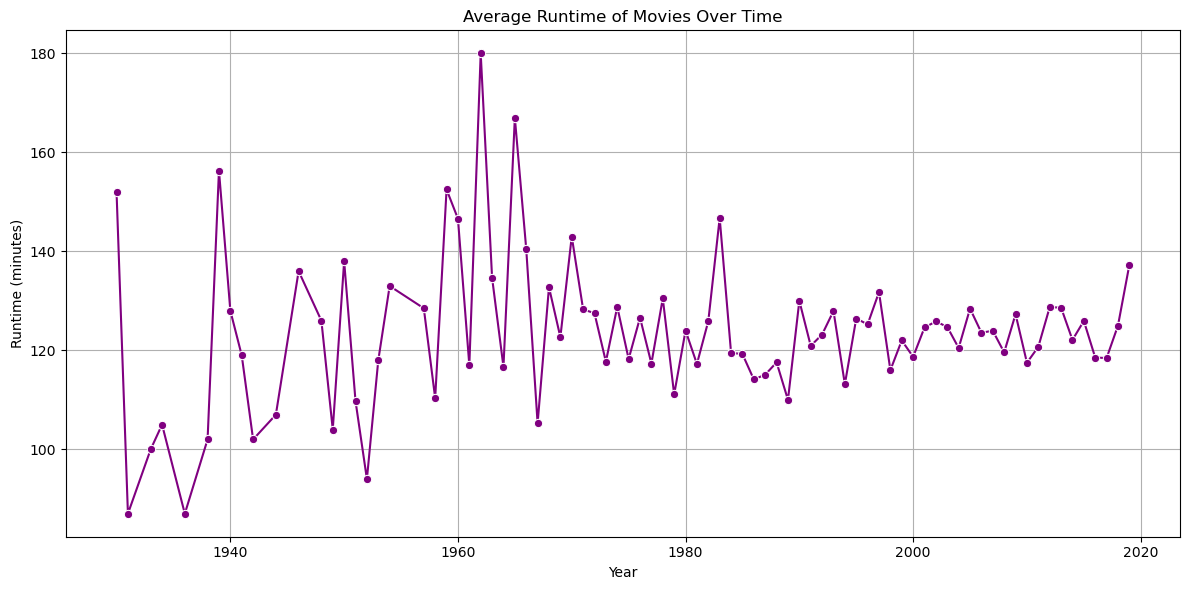

In [115]:
runtime_trend = df.groupby('Released_Year')['Runtime'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=runtime_trend, x='Released_Year', y='Runtime', color='purple', marker='o')
plt.title("Average Runtime of Movies Over Time")
plt.xlabel("Year")
plt.ylabel("Runtime (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [125]:
pip install networkx


C:\Users\text7\AppData\Local\Temp\ipykernel_12320\2188390250.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\text7\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


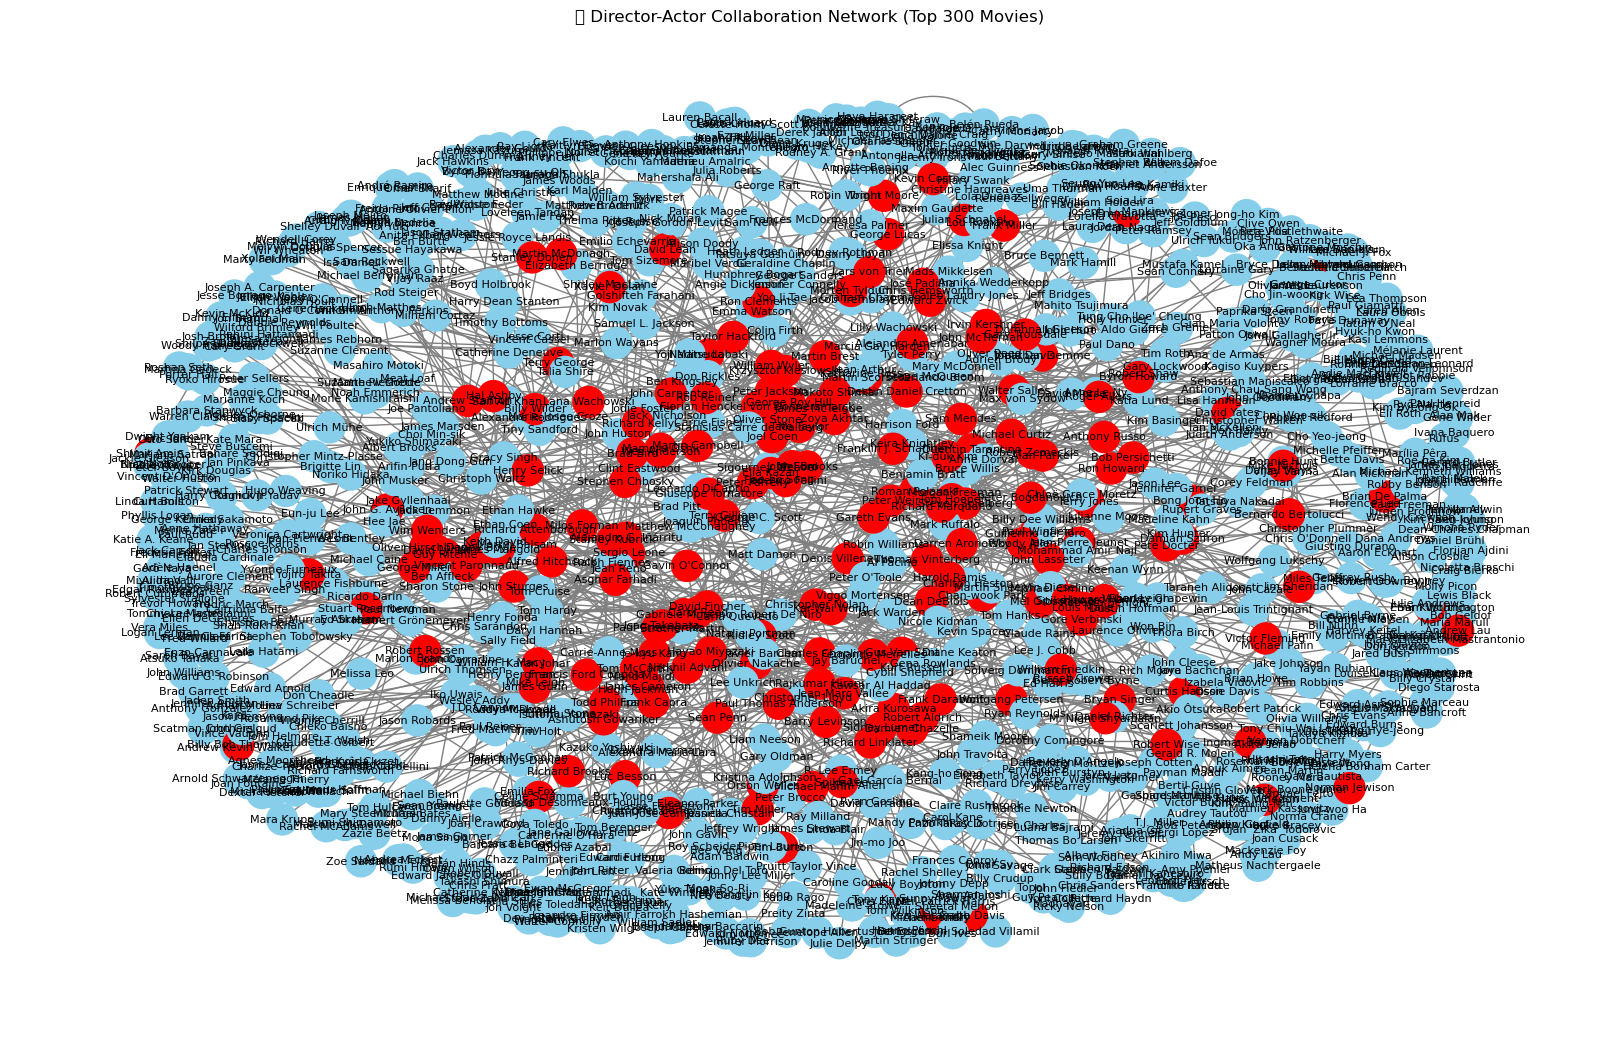

In [127]:
#Network Graph – Actor & Director Collaboration
import networkx as nx
import matplotlib.pyplot as plt

# We'll use a subset of 300 movies to keep the graph readable
subset = df[['Director', 'Star1', 'Star2', 'Star3', 'Star4']].dropna().head(300)

# Create the graph
G = nx.Graph()

for _, row in subset.iterrows():
    director = row['Director']
    stars = [row['Star1'], row['Star2'], row['Star3'], row['Star4']]
    
    for star in stars:
        G.add_node(director, type='director')
        G.add_node(star, type='actor')
        G.add_edge(director, star)

plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G, k=0.3)

# Color directors differently
colors = ['red' if G.nodes[node]['type'] == 'director' else 'skyblue' for node in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=colors, node_size=500, font_size=8, edge_color='gray')
plt.title("🎬 Director-Actor Collaboration Network (Top 300 Movies)")
plt.axis('off')
plt.tight_layout()
plt.show()


In [129]:
pip install shap lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 660.6 kB/s eta 0:00:01
     ------------- ------------------------- 92.2/275.7 kB 1.1 MB/s eta 0:00:01
     -------------------------- ----------- 194.6/275.7 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ----------- --------------------------- 163.8/544.4 kB 10.2 MB/s eta 0:00:01
   --------------------------- ------------ 378.9/544.4 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 4.9 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=f44397b1ed2f1c5f730f3531b37c92168ab205c49fe9f8866467ba27e1e87fab
  Stored in directory: c:\users\text7\appdata

In [131]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Encoding categorical variables
df_clean = df[['Runtime', 'Votes (Million)', 'Primary Genre', 'Rating Category']].dropna()
le_genre = LabelEncoder()
df_clean['Genre_Code'] = le_genre.fit_transform(df_clean['Primary Genre'])

le_rating = LabelEncoder()
df_clean['Rating_Code'] = le_rating.fit_transform(df_clean['Rating Category'])

X = df_clean[['Runtime', 'Votes (Million)', 'Genre_Code']]
y = df_clean['Rating_Code']

# Train the model
model = RandomForestClassifier()
model.fit(X, y)


RandomForestClassifier()

In [137]:
#LIME: Local Model Interpretation
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns,
    class_names=le_rating.classes_,
    mode='classification'
)

# Explain the first instance
exp = explainer.explain_instance(X.iloc[0].values, model.predict_proba)
exp.show_in_notebook(show_table=True)


C:\Users\text7\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [139]:
print(df.columns)


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross',
       'Primary Genre', 'Decade', 'Rating Category', 'Votes (Million)',
       'Description', 'Sentiment', 'Combined_Features'],
      dtype='object')


In [141]:
#Profitability Analysis
import numpy as np

# Simulate a budget between 1M and 150M
np.random.seed(42)
df['Budget'] = np.random.randint(1_000_000, 150_000_000, size=len(df))


In [143]:
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')  # Convert if string with commas
df['ROI'] = (df['Gross'] - df['Budget']) / df['Budget']


C:\Users\text7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


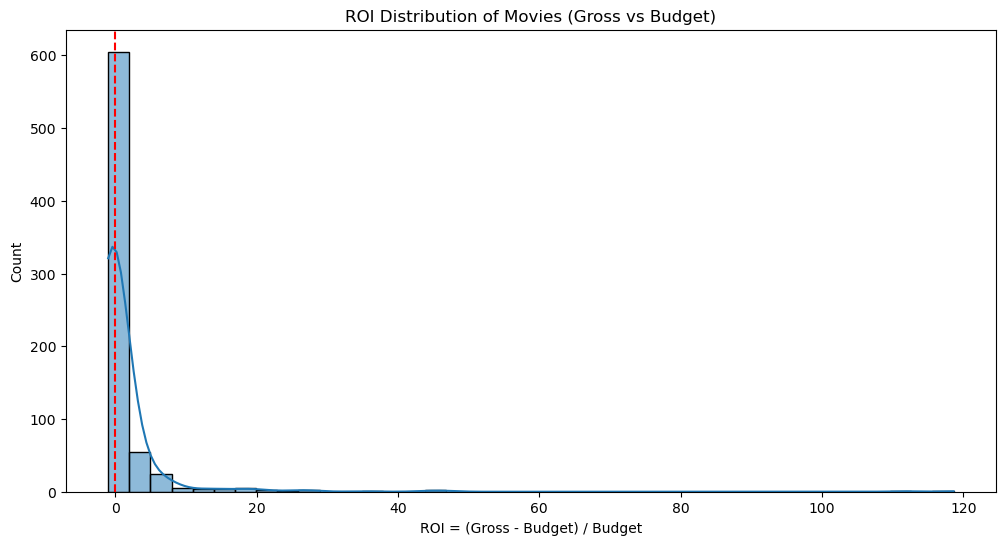

In [145]:
#Visualize ROI Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df['ROI'], bins=40, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("ROI Distribution of Movies (Gross vs Budget)")
plt.xlabel("ROI = (Gross - Budget) / Budget")
plt.ylabel("Count")
plt.show()


In [149]:
#Top 10 Most Profitable Movies
top_roi = df.sort_values('ROI', ascending=False)[['Series_Title', 'Budget', 'Gross', 'ROI']].head(10)
print("💰 Top 10 Most Profitable Movies:\n")
print(top_roi.to_string(index=False))


💰 Top 10 Most Profitable Movies:

                     Series_Title   Budget     Gross        ROI
                  Wo hu cang long  1070640 128078872 118.628327
       X-Men: Days of Future Past  2079600 233921534 111.483907
                    Batman Begins  4331068 206852432  46.760144
            The Dark Knight Rises  9585377 448139099  45.752371
       Die Hard: With a Vengeance  2222869 100012499  43.992529
                   Hidden Figures  4693305 169607287  35.138134
                Road to Perdition  3667867 104454762  27.478340
The Hobbit: An Unexpected Journey 10702701 303003568  27.310944
              Edward Scissorhands  2043233  56362352  26.584887
  One Flew Over the Cuckoo's Nest  4344769 112000000  24.778125


C:\Users\text7\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


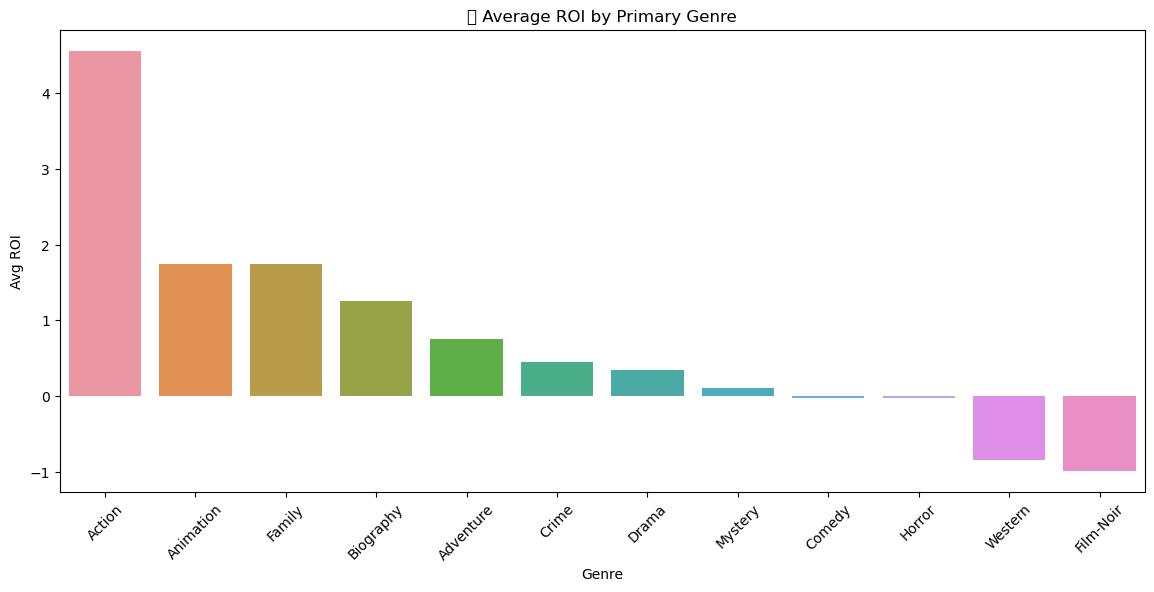

In [151]:
#ROI by Genre
df['Primary Genre'] = df['Genre'].str.split(',').str[0]
genre_roi = df.groupby('Primary Genre')['ROI'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=genre_roi.index, y=genre_roi.values)
plt.xticks(rotation=45)
plt.title("📊 Average ROI by Primary Genre")
plt.ylabel("Avg ROI")
plt.xlabel("Genre")
plt.show()


In [153]:
# Anomaly Detection – Find Unusual Movies
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Features to detect anomalies on
features = ['Runtime', 'IMDB_Rating', 'Votes (Million)', 'Budget', 'Gross']
df_anomaly = df[features].dropna()

# Fit model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_anomaly['anomaly'] = iso_forest.fit_predict(df_anomaly)

# -1 = anomaly, 1 = normal
df_anomaly['anomaly'] = df_anomaly['anomaly'].map({1: 'Normal', -1: 'Anomaly'})


C:\Users\text7\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


C:\Users\text7\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


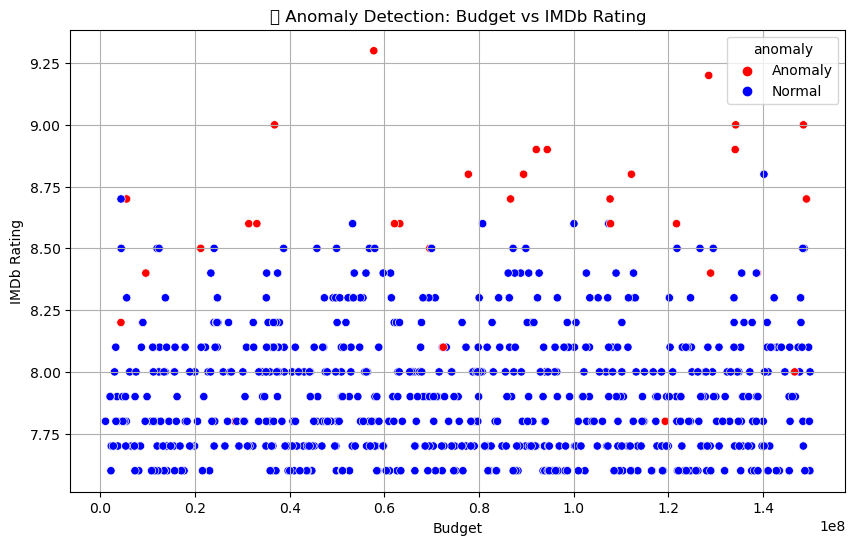

In [155]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_anomaly, x='Budget', y='IMDB_Rating', hue='anomaly', palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title("🎯 Anomaly Detection: Budget vs IMDb Rating")
plt.xlabel("Budget")
plt.ylabel("IMDb Rating")
plt.grid(True)
plt.show()
